<a href="https://colab.research.google.com/github/PRANAVIKONDA/496activities/blob/main/PranaviK_DuPontAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [81]:
import requests
import pandas as pd


myAPIKey = '08faf87f7d58fe68a394a20863fe8496'

stock = 'NFLX'

balanceStatements = requests.get(f'https://financialmodelingprep.com/api/v3/balance-sheet-statement/{stock}?apikey={myAPIKey}').json()

incomeStatements = requests.get(f'https://financialmodelingprep.com/api/v3/income-statement/{stock}?apikey={myAPIKey}').json()

In [82]:
print (balanceStatements[:10])

[{'date': '2021-12-31', 'symbol': 'NFLX', 'reportedCurrency': 'USD', 'cik': '0001065280', 'fillingDate': '2022-01-20', 'acceptedDate': '2022-01-27 17:03:33', 'calendarYear': '2021', 'period': 'FY', 'cashAndCashEquivalents': 6027804000, 'shortTermInvestments': 0.0, 'cashAndShortTermInvestments': 6027804000, 'netReceivables': 804320000, 'inventory': 0.0, 'otherCurrentAssets': 1237701000, 'totalCurrentAssets': 8069825000, 'propertyPlantEquipmentNet': 1323453000, 'goodwill': 0.0, 'intangibleAssets': 30919539000, 'goodwillAndIntangibleAssets': 30919539000, 'longTermInvestments': 0.0, 'taxAssets': 0.0, 'otherNonCurrentAssets': 4271846000, 'totalNonCurrentAssets': 36514838000, 'otherAssets': 0.0, 'totalAssets': 44584663000, 'accountPayables': 837483000, 'shortTermDebt': 699823000, 'taxPayables': 0.0, 'deferredRevenue': 1209342000, 'otherCurrentLiabilities': 5742318000, 'totalCurrentLiabilities': 8488966000, 'longTermDebt': 14693072000, 'deferredRevenueNonCurrent': 0.0, 'deferredTaxLiabilities

In [83]:
twoYearBalanceStatement= balanceStatements[:5]
twoYearIncomeStatement= incomeStatements[:5]

In [84]:
date=[]
profitability=[]
assetTurnOver=[]
capitalStructure=[]
returnOnEquity=[]

for i in range (0,5):
  date.append(twoYearIncomeStatement[i]['date'])
  profitabilityValue=twoYearIncomeStatement[i]['netIncome']/twoYearIncomeStatement[i]['revenue']
  profitability.append(profitabilityValue)
  assetTurnOverValue=twoYearIncomeStatement[i]['revenue']/twoYearBalanceStatement[i]['totalAssets']
  assetTurnOver.append(assetTurnOverValue)
  capitalStructureValue=twoYearBalanceStatement[i]['totalAssets']/twoYearBalanceStatement[i]['totalStockholdersEquity']
  capitalStructure.append(capitalStructureValue)
  returnOnEquityValue=profitabilityValue*assetTurnOverValue*capitalStructureValue
  returnOnEquity.append(returnOnEquityValue)

In [85]:
print(returnOnEquity)

[0.3228057255460954, 0.24955581623173106, 0.24622491990076173, 0.23120754605331603, 0.1560401635307636]


In [86]:
Dataframe= pd.DataFrame(columns=['date','profitability','assetTurnOver','capitalStructure','returnOnEquity'])
Dataframe['date']=date
Dataframe['profitability']=profitability
Dataframe['assetTurnOver']=assetTurnOver
Dataframe['capitalStructure']=capitalStructure
Dataframe['returnOnEquity']=returnOnEquity

print(Dataframe)    

         date  profitability  assetTurnOver  capitalStructure  returnOnEquity
0  2021-12-31       0.172276       0.666100          2.813046        0.322806
1  2020-12-31       0.110473       0.636350          3.549888        0.249556
2  2019-12-31       0.092621       0.593260          4.481009        0.246225
3  2018-12-31       0.076688       0.608073          4.958115        0.231208
4  2017-12-31       0.047801       0.614994          5.307922        0.156040


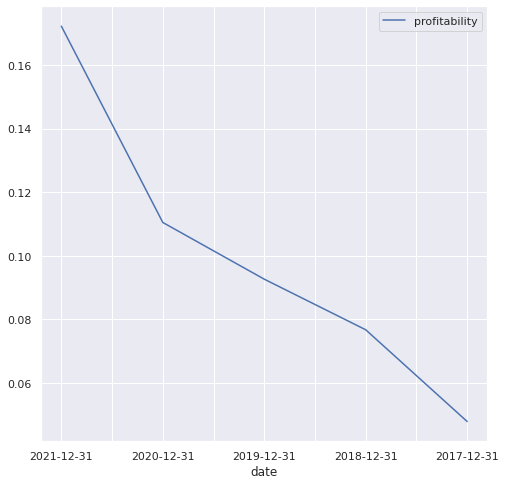

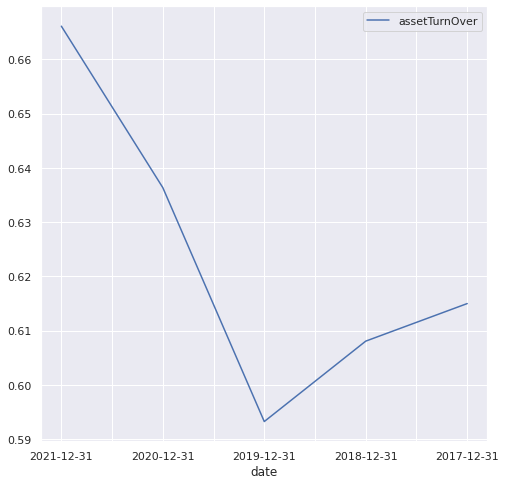

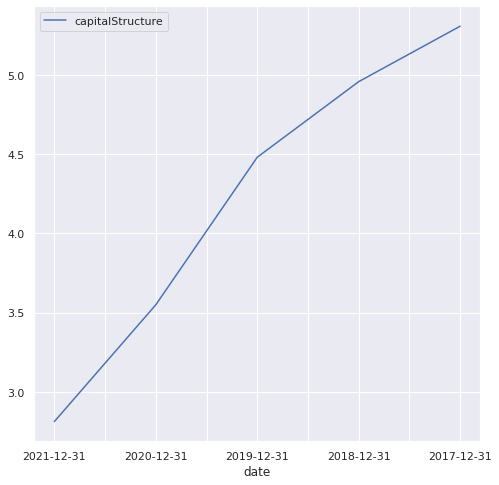

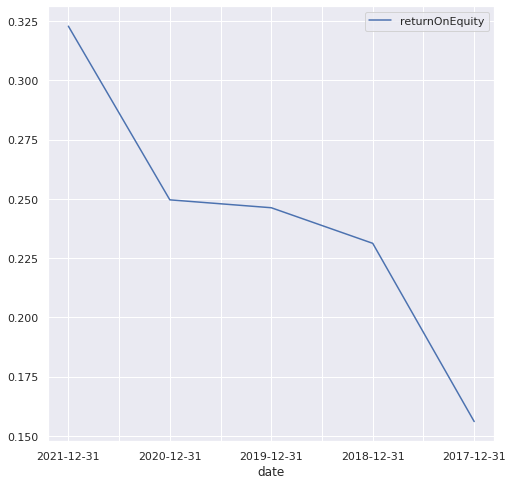

In [122]:
 #separate visual code
import matplotlib.pyplot as plt

Dataframe.plot(x='date', y='profitability', kind='line')
plt.show()
Dataframe.plot(x='date', y='assetTurnOver', kind='line')
plt.show()
Dataframe.plot(x='date', y='capitalStructure', kind='line')
plt.show()
Dataframe.plot(x='date', y='returnOnEquity', kind='line')
plt.show()

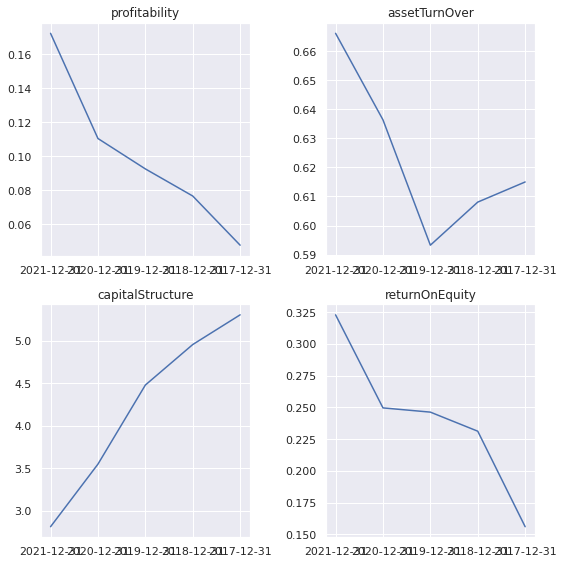

In [123]:
#layoutcode 
import matplotlib.pyplot as plt
fig, axs=plt.subplots(2,2, figsize=(8,8))
x=Dataframe['date']

axs[0,0].plot(x,Dataframe['profitability'])
axs[0,0].set_title('profitability')
axs[0,1].plot(x,Dataframe['assetTurnOver'])
axs[0,1].set_title('assetTurnOver')
axs[1,0].plot(x,Dataframe['capitalStructure'])
axs[1,0].set_title('capitalStructure')
axs[1,1].plot(x,Dataframe['returnOnEquity'])
axs[1,1].set_title('returnOnEquity')
fig.tight_layout()


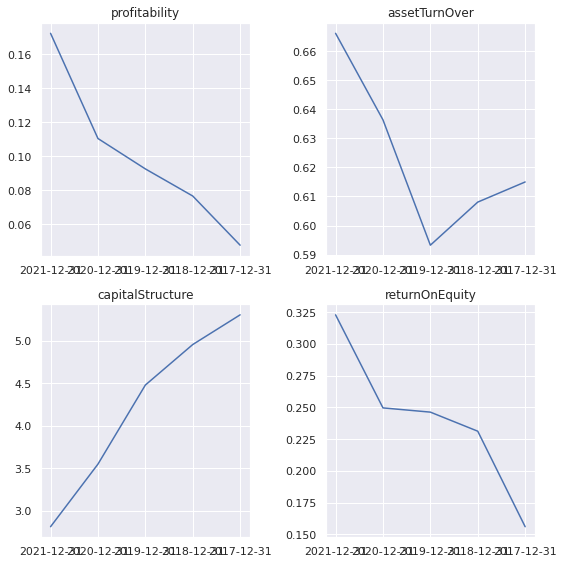

In [124]:
#loop code 
import matplotlib.pyplot as plt
fig, axs=plt.subplots(2,2, figsize=(8,8))
x=Dataframe['date']

values=['profitability','assetTurnOver','capitalStructure','returnOnEquity']
for i in range(0,2):
  for j in range(0,2):
    valueIndex=i*2+j
    axs[i,j].plot (x,Dataframe[values[valueIndex]])
    axs[i,j].set_title(values[valueIndex])

fig.tight_layout()